## Rheokinetics (44 points)

In [1]:
#import packages here
import numpy as np
import matplotlib.pyplot as pl0t

#### In the last notebook, you got familiar with the kinetics related to the curing of thermoset polymers. This time, you will be working on flow-related topics of such polymers. This is applicable to several manufacturing techniques you heard of in the lectures, like injection moulding.

#### As you now know, the curing of a thermoset consists of chemical reactions between individual monomers, or polymer chains and monomers, or polymer chains and other polymer chains. When this crosslinking happens, the molecular weight of thermosets becomes bigger and bigger. The viscosity increases accordingly.
#### The viscosity of a fluid is a measure of its resistance to deformation at a given rate. Viscosity can be conceptualized as quantifying the internal frictional force that arises between adjacent layers of fluid that are in relative motion.

### Question 1 (2 points)

#### As mentioned in the text above, viscosity changes as convergence $\alpha$ changes. Explain, on a physical and chemical level, why this occurs. Also briefly discuss why this variable is important to understand for liquid composite moulding manufacturing.

$\alpha$ (degree of cure ) increases with the progression of the curing process. In thermosets , viscosity is lower at the beginning of curing, as soon as the hardener and resin are mixed together , the conversion process begins and when the threshhold degree of cure is reached(gel time) ,there is a rapid increase in the formation of crosslinks, which causes the polymer to flow slower (increased resistance to flow or viscosity),transforming from a liquid state to a gel state and continues to cure and harden as the viscosity approaches infinity.
As viscosity is a function of $\alpha$, it increases as viscosity increases and crosslinks form. The thermoset polymer should possess appropriate gel time so as to accomodate the wetting of the fiber at low viscosities and uniform spread of polymer before the gel time is met. This is important to keep in mind to produce high quality parts using liquid composite molding techniques.If viscosity of the resin increases too fast(gel time occurs fast), the flow of resin will be highly constrained resulting in voids, poor adhesion between the layers, uneven distribution of resin causing dry spots and increased risk of delamination and reduced overall strength of composite.


#### Several models exists to predict (or help predict) the flow behaviour of thermoset materials. The Castro-Macosko model is a widely used and well-established model to simulate the changes in viscosity of thermoset materials. The model describes the viscosity as a function of temperature $T$ and convergence $\alpha$. Shear rate $\gamma$ will not be considered in this version of the model. The model is displayed in equation 1.

$$\eta(T, \alpha) = \eta_0(T) (\frac{\alpha_g}{\alpha_g - \alpha})^{c1+c2\alpha}$$

#### For which $\eta_0(T) = A \exp \frac{T_b}{T}$ and $T_b, c1, c2, \alpha_g$ and $A$ are material properties. 
#### The parameter $\alpha_g$ correlates with the degree of cure at the gel point, at which point the viscosity of material increases significantly.

### Question 2.1 (1 point)

#### Look up the above-mentioned material properties for a certain thermosetting polymer (which you can choose yourself). Report these values below ($T_b, c1, c2, \alpha_g$ and $A$) and add the name of the material and the reference where you got these from. NB: it is also okay to report $A$ and $T_b$ combined as the single value $\eta_0$. In that case, do report the value of $T$ for which this holds.

In [2]:
Tb=5309
c1=1.03
c2=0.2
ag=0.17
A=1.78e-7



Source:https://www.researchgate.net/publication/237900331_Computational_Modeling_and_Validation_of_the_Encapsulation_of_Plastic_Packages_by_Transfer_Molding
 Material -Sumikon EME 6300HN epoxy cresolphenol novolac resin loaded with 75 percent wt Silica filler.


### Question 2.2 (2 points)

#### Plot the Macosko function taking $T$ and $\alpha$ as inputs and returning a value of $\eta$ for your chosen resin. Then, assuming an isothermal scenario, use this function to plot viscosity vs. degree of cure. Write down the temperature you chose.

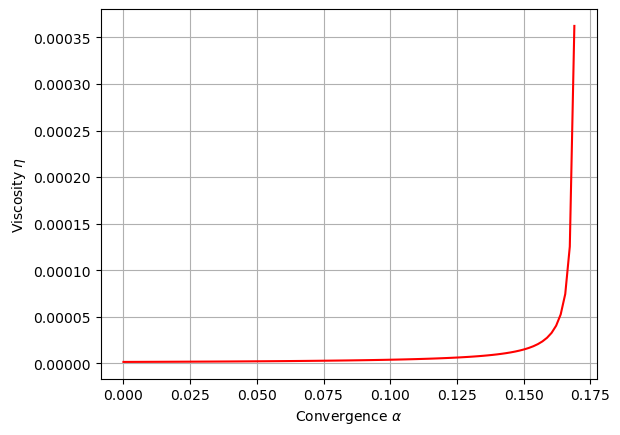

In [3]:

Tc = 300
Tk=Tc+273
def N(Tc, A, TB):
 s= A * np.exp(Tb/Tc)
 return s
def n(Tc, a, ag, n0, A, TB, c1, c2 ):
 n = A * N(Tc, A, TB) * (ag/(ag-a)) ** (c1 + c2 * a)
 return n
a = np.linspace(0, ag-0.001, 100)
nu = n(Tc, a, ag, N, A, Tb, c1, c2 )
pl0t.plot( a, nu, "r-")
pl0t.xlabel(r"Convergence $\alpha$")
pl0t.ylabel(r"Viscosity $\eta$")
pl0t.grid()
pl0t.show()

### Question 3 (4 points)

#### In the image below, a typical viscosity vs. temperature plot is displayed. A U-shape viscosity curve pattern can be observed when the temperature is increased. The viscosity drops at first. After reaching a minimum, viscosity soon increases significantly.

#### Explain the shape of the curves. 
#### 1. Why does it first go down before quickly going up? 
#### 2. Why does the heating rate have an effect on the shape of the curve? 
#### Please provide complete and detailled explanations. Write your answer in the textbox below the image. Refer to the Castro-Macosko equation as part of your answer.

![title](eta_temp.png)

Answer:



#### Dynamic Mechanical Analysis, otherwise known as DMA, is a technique where a small deformation is applied to a sample in a cyclic manner. This allows the materials response to stress, temperature, frequency and other values to be studied.

#### DMA works by applying a sinusoidal deformation to a sample of known geometry. The sample can be subjected to a controlled stress or a controlled strain. For a known stress, the sample will then deform a certain amount (or vice versa). How much a sample deforms is related to its stiffness.

#### DMA measures stiffness and damping, these are reported as modulus and tan delta. Because we are applying a sinusoidal force, we can express the modulus as an in-phase component  (the storage modulus) and an out of phase component (the loss modulus). The storage modulus G' is the measure of the sample’s elastic behavior. The ratio of the loss to the storage is the tan delta and is often called damping. It is a measure of the energy dissipation of a material.

### Question 4 (3 points)

#### The image below shows a shear-stress shear-strain relationship for various materials over time. As mentioned above, the shear-strain is applied in a sinusoidal manner. This leads to shear-stresses in various different ways. 

#### Comment on the shapes and phase-shifts of the graphs of the Hooke solid, Newton fluid, and polymer. Explain why these are exactly the results you would expect from a DMA analysis on these 3 materials.

![title](phase_shift.png)

Answer:



#### From tests like these, information about the storage modulus G' and loss modulus G'' can be derived. This is achieved via a known complex relationship between shear-stress and shear-strain.
$$ G* = \frac{\tau_{max}}{\gamma_{max}} = G' + iG'' $$

#### This can then be used to relate to the phase shift $\delta$ in the following manner.
$$ tan(\delta) = \frac{G''}{G'} $$

### Question 5 (2 points)

#### Attached to this notebook is a dataset containing DMA measurement data. In this dataset, storage and loss moduli are noted for different frequencies at different temperatures. The sample is Airstone 780E, at 95% cure (only use sample #1). From this data, create a plot which shows $G'$, $G''$ vs temperature (for each frequency) and a plot of $tan(\delta)$ vs temperature (for each frequency). Make sure to use correct scaling of the axis.

### Question 6 (2 points)

#### From your results in Question 5, a plot can be seen which contains G' and G'' vs temperature for Airstone 780E at 95% convergence. Answer the following questions about the relation between moduli and temperature.
#### 1. Why does the storage modulus G' decrease?
#### 2. Why does the loss modulus G'' increase, followed by a decrease (so why does it peak)?
#### Please provide detailled answers in the textbox below.

Answer: 1. Storage modulus shows the elastic energy stored into the system that could be released after loading. With continuous heating procedure, the polymer chain volume increases by heating up to the glass transition temperature and it enables the resin flow easier. So here, it acts more like fluid and the molecules gain higher mobility with the heat driven force that means the stored energy decreases.Fluids have lesser resistance to deformation, thereby possessing lower storage modulus.


2. Loss modulus means the heat energy dissipated out to the system. In terms of a wide range of temperature, the storage and loss modulus all decrease while heating because force is less needed for deformation.
 Here, loss modulus increases because the heat energy is released into the system immediately after the polymer chain had higher mobility. Then in the glass transition temperature, cross linking hinders the mobility and the loss modulus drops.


### Question 7 (3 points)

#### What can you derive from your results of question 5? What effect does the frequency have of storage modulus $G'$? Explain how this happens and why it is important to take this into consideration.

In lower frequency, storage modulus dropped slightly faster than the higher frequency. This phenomenon is related to relaxation time of material and the oscillating frequency. So, in lower frequency the matrix has longer time to lose it energy and it has sharper drop in the graph. On the other hand, the storage modulus was recorded higher in higher frequency measurements. That is because the material has short period of time to react on the oscillating vibrations and act more like an elastic solid by still containing the vibrational energy in the chain. The experiment frequency should be considered because the property might differ by the changing value of storage modulus.Answer:



### Question 8.1 (4 points)

#### From the above-used dataset, plot storage modulus vs. temperature for every frequency. Then, find $T_g$ for each curve by using the following method: Tg can be determined from the intersection of two lines that are drawn in two regions; one in the brittle glassy state and the other in the transition region. The temperature at which these 2 lines intersect can be considered $T_g$. Report the found values of $T_g$ in the title(s). Also, demonstrate this method in the said plot: plot the intersecting lines ontop of the data. If you feel it's necessary, zoom in on the points of intersect.

### Question 8.2 (4 points)

#### In Question 8.1, you determined the $T_g$ for each frequency by determining the onset of the storage modulus curve. Now, find values for $T_g$ (for each frequency) using the inflection point of the storage modulus curve. The inflection point is defined as the midpoint between the onset and offset of the curve. Like you did before, plot the intersecting lines and the point of interest on top of the data.

### Question 9.1 (4 points)

#### Other valid methods of finding $T_g$ also exist. One of these methods works by taking the peak of the loss modulus $G''$. The corresponding temperature is then said to be $T_g$. Another method works the same as the previously mentioned method, but uses the $tan(\delta)$ function.

#### Create 2 figures below and apply both methods seperately. Again, report the found values of $T_g$ and show a visualisation of the method. 

### Question 9.2 (2 points)

#### Create a figure in which you plot all found results of values of $T_g$ per frequency (for all 4 different methods). What trend do you notice in this plot? Explain on a physical level why this trend makes sense.

Answer:



#### Now that several points on viscosity are discussed, we will switch the focus to polymer flow. In this case we will consider RTM. This will be done with the help of Darcy's law. The most widely used equation for describing flow through RTM molds is Darcy’s equation for flow through porous media, displayed in equation 4.
$$ Q = \frac{K_{ij}A}{\eta L} \Delta P $$

#### For which $K_{ij}$ is the permeability tensor for the preform and $L$ is the distanced traveled by the resin. An average value of $K$ can be found from the Kozeny-Carman equations for resin flow in a unidirectional fibre network. For further information, please visit Chapter 4.4 ''Resin Flow'' from Processing of Polymer Matrix Composites by P.K. Mallick.


### Question 10.1 (4 points)

#### Consider the panel in the picture below. As of now, the panel consists of a preform and still needs to beinjected with epoxy resin. The fibres are T700 carbon fibres, the fibre volume content can be set to 40% (already at time of injection). The lay-up is [20%@90° / 30%@+-45° / 50%@0°] symmetric and balanced, with the 0 degree direction aligned in the length direction of the panel. The injection and mould temperature is 120°C. The gelation time of the resin is and the infusion time is set to 90 minutes. The viscosity of the resin can be assumed to linearly increase from 0.03 to 0.045 Pa.s over the course of 90minutes, at a temperature of 120°C.

![title](flow_fig.png)

#### You want to inject this part with a constant flow rate. To achieve this, determine the required pressure gradient [Bar] over time [min] and report your results in a graph. Also report what steps you took to find a proper value of $K$.

Answer:



### Question 10.2 (3 points)

#### What is your opinion about the required pressure gradients? What would you change about this manufacturing technique to improve it? In the cells below, write your reflection and write a new segment of code in which you implement your idea. Compare your new results to the results found above.

Reflection:



### Question 11 (4 points)

#### As you know, fibre volume content $V_f$ plays an important role in the permeability of a preform and therefore influences the required injection pressure. Now, assume a constant viscosity of 0.03  Pa.s and a distance of 1 meter for the resin to flow. Determine the required pressure to inject over this distance in 40 minutes, for different fibre volume fractions from 0.35 to 0.65 with steps of 0.05. The same laminate is used as for Q6. 

#### - Create a graph which shows $log K$ (y-axis) vs. $V_f$ (x-axis).

#### - Next, report your results to the described situation in the form of a graph showing required $\Delta P$ for infusion per fibre volume fraction.